<a href="https://colab.research.google.com/github/mariatomy9/Mini_Project/blob/master/Image_classification(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [40]:
!ls

test_data  train_data


In [41]:
cd /content/drive/My Drive/images

/content/drive/My Drive/images


In [42]:
!ls

test_data  train_data


# Generating Image Data

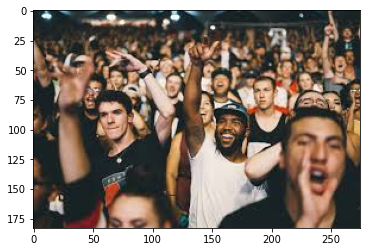

In [43]:
path = '/content/drive/My Drive/images/train_data/nsd/1.jpg'
import cv2
import matplotlib.pyplot as plt

i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [44]:
import os
import cv2
path = '/content/drive/My Drive/images/train_data/nsd'
for filename in os.listdir(path):
  i = cv2.imread(os.path.join(path,filename))
  print(i.shape)

(183, 275, 3)
(183, 275, 3)
(183, 276, 3)
(168, 300, 3)
(194, 259, 3)
(169, 298, 3)
(168, 300, 3)
(169, 299, 3)
(183, 275, 3)
(203, 248, 3)
(183, 275, 3)
(168, 300, 3)
(168, 300, 3)
(266, 190, 3)
(168, 301, 3)
(193, 261, 3)
(168, 300, 3)
(183, 275, 3)
(168, 300, 3)
(159, 318, 3)
(183, 275, 3)
(183, 275, 3)
(183, 275, 3)
(179, 281, 3)
(123, 410, 3)
(176, 287, 3)
(187, 270, 3)
(168, 300, 3)
(299, 620, 3)
(533, 800, 3)
(193, 261, 3)
(190, 265, 3)
(168, 300, 3)
(675, 1200, 3)
(181, 279, 3)
(172, 293, 3)
(168, 300, 3)
(183, 275, 3)
(180, 280, 3)


In [45]:
import os
import cv2
path = '/content/drive/My Drive/images/train_data/nsd'
for filename in os.listdir(path):
  i = cv2.imread(os.path.join(path,filename))
  print(i)

[[[24 23  9]
  [37 36 22]
  [43 40 25]
  ...
  [36 35 25]
  [37 36 26]
  [37 36 26]]

 [[46 45 31]
  [40 39 25]
  [41 38 23]
  ...
  [36 35 25]
  [37 36 26]
  [37 36 26]]

 [[37 36 22]
  [36 35 21]
  [35 32 17]
  ...
  [36 36 24]
  [37 37 25]
  [37 37 25]]

 ...

 [[29 37 37]
  [31 39 39]
  [35 42 45]
  ...
  [36 34 24]
  [36 34 24]
  [36 34 24]]

 [[30 38 38]
  [33 41 41]
  [36 43 46]
  ...
  [36 34 24]
  [36 34 24]
  [36 34 24]]

 [[31 39 39]
  [34 42 42]
  [37 44 47]
  ...
  [36 34 24]
  [36 34 24]
  [36 34 24]]]
[[[130  91  93]
  [ 98  61  63]
  [134  99 103]
  ...
  [121 131 141]
  [115 127 145]
  [108 120 138]]

 [[186 149 153]
  [176 141 145]
  [104  71  75]
  ...
  [161 165 176]
  [124 131 148]
  [ 96 100 119]]

 [[194 162 167]
  [183 153 158]
  [105  78  82]
  ...
  [221 215 226]
  [163 155 172]
  [119 108 128]]

 ...

 [[ 36  46  46]
  [ 27  39  41]
  [ 25  35  42]
  ...
  [139 162 212]
  [118 145 196]
  [109 133 185]]

 [[ 49  59  59]
  [ 37  46  49]
  [ 26  35  39]
  ...
  

# Importing Libraries

In [46]:
import os
from skimage.io import imread
from skimage.transform import resize

In [47]:
import numpy as np

# Preprocessing Image Data

In [48]:
target = []   # This is the list of Target Output
flat_data = []   # Image pixel in flatten style
images= []

path = '/content/drive/My Drive/images/train_data/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  # Scaling down
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

  

(78, 7500)
(78,)
(78, 50, 50, 3)


In [49]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.088216,0.152598,0.167314,0.230471,0.343882,0.380824,0.266039,0.406912,0.457588,0.101333,0.179765,0.207216,0.284314,0.415059,0.465725,0.227500,0.388314,0.447480,0.142784,0.217961,0.224824,0.142784,0.220588,0.228451,0.197745,0.328873,0.364843,0.244941,0.371873,0.392480,0.138873,0.190539,0.208892,0.256627,0.263137,0.267441,0.237363,0.266775,0.253363,0.125510,...,0.094118,0.133333,0.145098,0.090196,0.129412,0.138902,0.137255,0.151971,0.138902,0.596784,0.438941,0.338941,0.819951,0.638578,0.543480,0.768941,0.581696,0.496392,0.593157,0.399696,0.301980,0.731069,0.544490,0.408520,0.492422,0.385569,0.284255,0.115676,0.143137,0.137255,0.094118,0.133333,0.141176,0.094118,0.133333,0.141176,0.092824,0.133333,0.141176,nsd
1,0.419510,0.401235,0.508137,0.321284,0.313137,0.373294,0.282255,0.303814,0.398294,0.299569,0.310039,0.359725,0.370863,0.366618,0.376078,0.472147,0.471480,0.512000,0.324176,0.383971,0.445088,0.355922,0.398745,0.454941,0.437265,0.434324,0.468951,0.418922,0.423510,0.467627,0.436667,0.370314,0.427843,0.316294,0.353912,0.404882,0.251941,0.302304,0.308490,0.389608,...,0.266912,0.174735,0.138147,0.511363,0.330971,0.243402,0.627873,0.361137,0.263422,0.255843,0.148980,0.114333,0.388088,0.220794,0.148255,0.253941,0.181049,0.144137,0.601275,0.406461,0.310069,0.376029,0.209039,0.146304,0.222539,0.121882,0.101284,0.609500,0.398373,0.332020,0.508961,0.299118,0.248814,0.535324,0.408902,0.390961,0.718578,0.548020,0.493461,nsd
2,0.518745,0.522667,0.530510,0.691089,0.695011,0.702854,0.650035,0.653957,0.661800,0.528558,0.532480,0.540323,0.523831,0.527752,0.535595,0.397873,0.401795,0.409638,0.572335,0.576256,0.584100,0.638231,0.642153,0.647631,0.856454,0.860376,0.866572,0.590787,0.594709,0.602552,0.616984,0.620906,0.628154,0.560001,0.563922,0.571765,0.599392,0.603314,0.611157,0.624379,...,0.139882,0.143804,0.151647,0.139882,0.143804,0.151647,0.141176,0.145098,0.152941,0.141176,0.145098,0.152941,0.137255,0.141176,0.149020,0.137647,0.141569,0.149412,0.311711,0.315632,0.323475,0.461274,0.465195,0.473038,0.450614,0.454536,0.462379,0.446787,0.450708,0.458551,0.159380,0.163302,0.171145,0.139882,0.143804,0.151647,0.139882,0.143804,0.151647,nsd
3,0.055059,0.043647,0.039373,0.124392,0.067882,0.065922,0.094824,0.055608,0.047412,0.280392,0.238510,0.251176,0.465412,0.424235,0.441882,0.227490,0.182745,0.202000,0.340627,0.317098,0.318000,0.604353,0.556235,0.508471,0.710510,0.697529,0.652431,0.255451,0.245490,0.229098,0.313176,0.329765,0.312314,0.246431,0.266392,0.238431,0.227255,0.107451,0.106235,0.354510,...,0.371490,0.398941,0.428000,0.355804,0.383255,0.406784,0.327647,0.355098,0.377020,0.314471,0.345843,0.357961,0.324980,0.356353,0.368118,0.313922,0.345294,0.357059,0.310196,0.341569,0.353333,0.330510,0.361882,0.373647,0.353490,0.382549,0.402510,0.337098,0.364549,0.388078,0.333686,0.361137,0.384667,0.240471,0.267569,0.291804,0.204118,0.206784,0.230667,nsd
4,0.576237,0.547882,0.505296,0.647442,0.570270,0.544888,0.589114,0.538949,0.487153,0.372353,0.315048,0.275765,0.526980,0.406902,0.359843,0.392794,0.304654,0.251948,0.499415,0.471865,0.445454,0.452620,0.455365,0.460659,0.329868,0.339437,0.349123,0.546784,0.524471,0.532314,0.479067,0.408871,0.389936,0.620755,0.546640,0.527307,0.535647,0.511059,0.521725,0.424938,...,0.022549,0.069608,0.069608,0.012039,0.057373,0.065062,0.013922,0.063176,0.082974,0.119638,0.157628,0.197981,0.213150,0.267005,0.328718,0.326588,0.369067,0.421420,0.141333,0.191940,0.229804,0.184806,0.202078,0.211608,0.734311,0.682806,0.682336,0.471288,0.467327,0.477602,0.053859,0.079373,0.107773,0.020196,0.042000,0.068191,0.084039,0.101922,0.129217,nsd


In [51]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.088216,0.152598,0.167314,0.230471,0.343882,0.380824,0.266039,0.406912,0.457588,0.101333,0.179765,0.207216,0.284314,0.415059,0.465725,0.227500,0.388314,0.447480,0.142784,0.217961,0.224824,0.142784,0.220588,0.228451,0.197745,0.328873,0.364843,0.244941,0.371873,0.392480,0.138873,0.190539,0.208892,0.256627,0.263137,0.267441,0.237363,0.266775,0.253363,0.125510,...,0.094118,0.133333,0.145098,0.090196,0.129412,0.138902,0.137255,0.151971,0.138902,0.596784,0.438941,0.338941,0.819951,0.638578,0.543480,0.768941,0.581696,0.496392,0.593157,0.399696,0.301980,0.731069,0.544490,0.408520,0.492422,0.385569,0.284255,0.115676,0.143137,0.137255,0.094118,0.133333,0.141176,0.094118,0.133333,0.141176,0.092824,0.133333,0.141176,nsd
1,0.419510,0.401235,0.508137,0.321284,0.313137,0.373294,0.282255,0.303814,0.398294,0.299569,0.310039,0.359725,0.370863,0.366618,0.376078,0.472147,0.471480,0.512000,0.324176,0.383971,0.445088,0.355922,0.398745,0.454941,0.437265,0.434324,0.468951,0.418922,0.423510,0.467627,0.436667,0.370314,0.427843,0.316294,0.353912,0.404882,0.251941,0.302304,0.308490,0.389608,...,0.266912,0.174735,0.138147,0.511363,0.330971,0.243402,0.627873,0.361137,0.263422,0.255843,0.148980,0.114333,0.388088,0.220794,0.148255,0.253941,0.181049,0.144137,0.601275,0.406461,0.310069,0.376029,0.209039,0.146304,0.222539,0.121882,0.101284,0.609500,0.398373,0.332020,0.508961,0.299118,0.248814,0.535324,0.408902,0.390961,0.718578,0.548020,0.493461,nsd
2,0.518745,0.522667,0.530510,0.691089,0.695011,0.702854,0.650035,0.653957,0.661800,0.528558,0.532480,0.540323,0.523831,0.527752,0.535595,0.397873,0.401795,0.409638,0.572335,0.576256,0.584100,0.638231,0.642153,0.647631,0.856454,0.860376,0.866572,0.590787,0.594709,0.602552,0.616984,0.620906,0.628154,0.560001,0.563922,0.571765,0.599392,0.603314,0.611157,0.624379,...,0.139882,0.143804,0.151647,0.139882,0.143804,0.151647,0.141176,0.145098,0.152941,0.141176,0.145098,0.152941,0.137255,0.141176,0.149020,0.137647,0.141569,0.149412,0.311711,0.315632,0.323475,0.461274,0.465195,0.473038,0.450614,0.454536,0.462379,0.446787,0.450708,0.458551,0.159380,0.163302,0.171145,0.139882,0.143804,0.151647,0.139882,0.143804,0.151647,nsd
3,0.055059,0.043647,0.039373,0.124392,0.067882,0.065922,0.094824,0.055608,0.047412,0.280392,0.238510,0.251176,0.465412,0.424235,0.441882,0.227490,0.182745,0.202000,0.340627,0.317098,0.318000,0.604353,0.556235,0.508471,0.710510,0.697529,0.652431,0.255451,0.245490,0.229098,0.313176,0.329765,0.312314,0.246431,0.266392,0.238431,0.227255,0.107451,0.106235,0.354510,...,0.371490,0.398941,0.428000,0.355804,0.383255,0.406784,0.327647,0.355098,0.377020,0.314471,0.345843,0.357961,0.324980,0.356353,0.368118,0.313922,0.345294,0.357059,0.310196,0.341569,0.353333,0.330510,0.361882,0.373647,0.353490,0.382549,0.402510,0.337098,0.364549,0.388078,0.333686,0.361137,0.384667,0.240471,0.267569,0.291804,0.204118,0.206784,0.230667,nsd
4,0.576237,0.547882,0.505296,0.647442,0.570270,0.544888,0.589114,0.538949,0.487153,0.372353,0.315048,0.275765,0.526980,0.406902,0.359843,0.392794,0.304654,0.251948,0.499415,0.471865,0.445454,0.452620,0.455365,0.460659,0.329868,0.339437,0.349123,0.546784,0.524471,0.532314,0.479067,0.408871,0.389936,0.620755,0.546640,0.527307,0.535647,0.511059,0.521725,0.424938,...,0.022549,0.069608,0.069608,0.012039,0.057373,0.065062,0.013922,0.063176,0.082974,0.119638,0.157628,0.197981,0.213150,0.267005,0.328718,0.326588,0.369067,0.421420,0.141333,0.191940,0.229804,0.184806,0.202078,0.211608,0.734311,0.682806,0.682336,0.471288,0.467327,0.477602,0.053859,0.079373,0.107773,0.020196,0.042000,0.068191,0.084039,0.101922,0.129217,nsd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 7501 entries, 0 to Target
dtypes: float64(7500), object(1)
memory usage: 4.5+ MB


In [53]:
df.nunique()

0         78
1         78
2         78
3         78
4         78
          ..
7496      74
7497      77
7498      77
7499      77
Target     2
Length: 7501, dtype: int64

# Training the Naive Bayes model on the training data

In [54]:
X=flat_data
y=target

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Predicting Results

In [58]:
y_pred=classifier.predict(X_test)

In [59]:
y_pred

array(['sd', 'nsd', 'nsd', 'sd', 'sd', 'sd', 'sd', 'nsd', 'sd', 'sd',
       'sd', 'sd', 'nsd', 'sd', 'sd', 'sd', 'nsd', 'nsd', 'nsd', 'sd'],
      dtype='<U3')

In [60]:
y_test

array(['sd', 'nsd', 'nsd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd', 'sd',
       'sd', 'nsd', 'sd', 'sd', 'nsd', 'nsd', 'nsd', 'nsd', 'nsd'],
      dtype='<U3')

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
ac=accuracy_score(y_pred,y_test)
print(ac)

[[ 6  1]
 [ 2 11]]
0.85
